In [39]:
using HDF5
using Plots

In [40]:
#function make_heatmap_data(data, x, y, v)
#    xs = unique(data[x])
#    ys = unique(data[y])
#    n = length(xs)
#    m = length(ys)
#    A = zeros((n, m))
#    D1 = Dict(x => i for (i,x) in enumerate(xs))
#    D2 = Dict(x => i for (i,x) in enumerate(ys))
#    for i in 1:size(data, 1)
#        xi = data[i, x]
#        yi = data[i, y]
#        vi = data[i, v]
#        A[D1[xi], D2[yi]] = vi
#    end
#    (xs, ys, A)
#end

In [413]:
filename = "OrszagTangVortex_0008.hdf5"

print("Time Base: ",head_base["Time"])
#fop = h5open(filename,"r")

Time Base: [0.5]

In [414]:
pos = h5read(filename,"PartType0/Coordinates")
Bfl = h5read(filename,"PartType0/Bfield") 
#Vel = h5read(filename,"PartType0/Velocities")
#alp = h5read(filename,"PartType0/EPalpha")
#bet = h5read(filename,"PartType0/EPbeta")
#Ids = h5read(filename,"PartType0/ParticleIDs")
h   = h5read(filename,"PartType0/SmoothingLengths")
rho = h5read(filename,"PartType0/Densities")
head= h5readattr(filename,"Header")
print("Time: ",head["Time"])

Time: [0.39999999999999997]

In [415]:
x = pos[1,:]
y = pos[2,:]
z = pos[3,:]
bx = Bfl[1,:]
by = Bfl[2,:]
bz = Bfl[3,:]
Vx = Vel[1,:]
Vy = Vel[2,:]
Vz = Vel[3,:]


v2 = Vx.*Vx.+Vy.*Vy.+Vz.*Vz
b2 = by.*by.+by.*by.+bz.*bz
    

Npart=size(Ids,1)

262144

In [416]:
function do_heat(b2,Nmax,d0)
    #Nmax=128
    #x=x.-minimum(x)
    #y=y.-minimum(y)
    Npart=size(b2)
    Lbox=1.0#+maximum(x)
    A = ones((Nmax, Nmax))*minimum(b2)
    grid = ones((Nmax, Nmax))
    #grid = [Set{Int}() for x=1:Nmax, y=1:Nmax];
    #insert(grid) = p -> push!(grid[trunc(Int, p.x/Lbox*Nmax), trunc(Int, p.y/Lbox*Nmax)], p.n);
    #foreach(insert(grid), data)
    x=d0[""]
    for ind = 1:Npart
        #print(i)
        i,j = trunc(Int, x[ind]/Lbox*Nmax+1), trunc(Int, y[ind]/Lbox*Nmax+1)
        #if(b2[ind]!= 0) 
           A[i,j] += b2[ind]
           grid[i,j] += 1
        #end 
    end
    AA=log10.(A./grid)
    #AA=(A./grid)
    (AA)
end

do_heat (generic function with 3 methods)

Min x:1.0601601218661386e-5 / Max x:0.9999999510818733
Min y:7.973624661650192e-6 / Max y:0.9999984519793859
Min z:1.5996177493962655e-8 / Max z:0.9999998620337552
Min h:0.016019508 / Max h:0.03250813


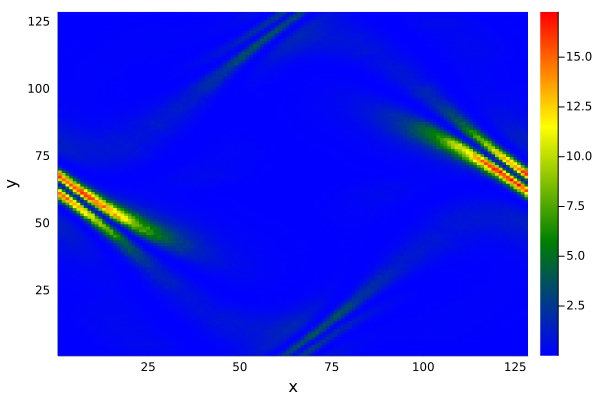

In [417]:
gr()
AA=do_heat(b2,128)
#data = rand(21,100)
#heatmap(1:size(data,1),
#    1:size(data,2), data,
#    c=cgrad([:blue, :white,:red, :yellow]),
heatmap(1:Nmax,1:Nmax,AA,c=cgrad([:blue,:green,:yellow,:red]),
    xlabel="x", ylabel="y")

In [418]:
function read_snap(filename :: String)
    
    pos  = h5read(filename,"PartType0/Coordinates")
    Bfl  = h5read(filename,"PartType0/Bfield") 
    Vel  = h5read(filename,"PartType0/Velocities")
    #alp  = h5read(filename,"PartType0/EPalpha")
    #bet  = h5read(filename,"PartType0/EPbeta")
    Ids  = h5read(filename,"PartType0/ParticleIDs")
    h    = h5read(filename,"PartType0/SmoothingLengths")
    rho  = h5read(filename,"PartType0/Densities")
    head = h5readattr(filename,"Header")

    print("Leyendo ",filename," at time: ",head["Time"],"\n")
    x = pos[1,:]
    y = pos[2,:]
    z = pos[3,:]
    bx = Bfl[1,:]
    by = Bfl[2,:]
    bz = Bfl[3,:]
    Vx = Vel[1,:]
    Vy = Vel[2,:]
    Vz = Vel[3,:]
    
    v2 = Vx.*Vx.+Vy.*Vy.+Vz.*Vz
    b2 = by.*by.+by.*by.+bz.*bz
    
    Npart=size(Ids,1)
        
    print("Min x:",minimum(x)," / Max x:",maximum(x),"\n")
    print("Min y:",minimum(y)," / Max y:",maximum(y),"\n")
    print("Min z:",minimum(z)," / Max z:",maximum(z),"\n")
    print("Min h:",minimum(h)," / Max h:",maximum(h),"\n")
    (Dict(:H => head, :x=>pos, :bfl=> Bfl, :b2=>b2, :v=>Vel, :v2=>v2, :rho=>rho, :hsml=>h))
end

read_snap (generic function with 1 method)

Min x:1.6108909297578994e-6 / Max x:0.9999974808748283
Min y:6.092027424742241e-7 / Max y:0.9999933107225116
Min z:6.960926334453887e-6 / Max z:0.9999973698438129
Min h:0.009520967 / Max h:0.051375266


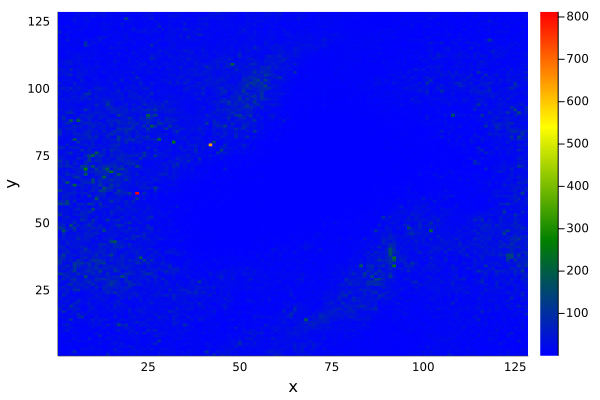

In [363]:
gr()
AA=do_heat(b2,128)
#data = rand(21,100)
#heatmap(1:size(data,1),
#    1:size(data,2), data,
#    c=cgrad([:blue, :white,:red, :yellow]),
heatmap(1:Nmax,1:Nmax,AA,c=cgrad([:blue,:green,:yellow,:red]),
    xlabel="x", ylabel="y")

In [374]:
a=read_snap("OrszagTangVortex_0000.hdf5")

Leyendo OrszagTangVortex_0000.hdf5 at time: [0.0]Min x:2.127160264396577e-6 / Max x:0.999999891062553
Min y:8.013688553368259e-7 / Max y:0.9999958223591977
Min z:5.432824003781533e-6 / Max z:0.999995444904396
Min h:0.019249799 / Max h:0.019416662


Dict{Symbol, Any} with 8 entries:
  :bfl  => Float32[-0.00220742 -0.0293351 … 0.0341059 0.00985368; 0.072642 0.38…
  :H    => Dict{String, Any}("NumPart_Total_HighWord"=>UInt32[0x00000000, 0x000…
  :v    => Float32[-0.012079 -0.126324 … 0.12035 0.0422583; 0.0631331 0.370472 …
  :rho  => Float32[0.21914, 0.221248, 0.22033, 0.220909, 0.220577, 0.220098, 0.…
  :b2   => Float32[0.0105537, 0.292282, 0.287815, 0.000805026, 0.000980639, 0.1…
  :v2   => Float32[0.00414, 0.153212, 0.127541, 0.0022691, 0.0807467, 0.104281,…
  :hsml => Float32[0.0193496, 0.0192879, 0.0193147, 0.0192978, 0.0193075, 0.019…
  :x    => [0.0104874 0.0607105 … 0.993332 0.982125; 0.00146305 0.0197549 … 0.9…

In [402]:
a[:x][:,1]

3-element Vector{Float64}:
 0.010487415159069792
 0.001463047389904197
 0.009465307008254714

In [424]:
lab=:b2
sat=a[lab]
print(size(sat,1))
sat[size(sat,1)-3]

262144

0.14340757f0